In [ ]:
# Deactivate distracting warnings
import warnings
warnings.filterwarnings("ignore")

: 

In [30]:
from data_processing import display_data_summary, load_event_data
from visualzation import load_data, plot_event_count, plot_kde, plot_goal_positions

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from floodlight.io.dfl import read_position_data_xml, read_event_data_xml
import pickle

In [32]:
# Define the path to the dataset
path = "data/"

In [4]:
# Display Data Summary. Note that executing this code can take several minutes due the complexity of the parsing routines.
display_data_summary(path)

Unique player IDs: 207
Unique teams: 10
Total number of events: 11137
Unique event ID counts:
 eID
Play_Pass                            5241
OtherBallAction                      1699
TacklingGame                         1412
Delete                               1074
ThrowIn_Play_Pass                     281
BallClaiming                          206
Foul                                  160
FreeKick_Play_Pass                    156
Play_Cross                            140
OutSubstitution                       128
GoalKick_Play_Pass                    119
ShotAtGoal_ShotWide                    63
CornerKick_Play_Cross                  53
ShotAtGoal_SavedShot                   41
Caution                                37
ShotAtGoal_BlockedShot                 37
KickOff_Play_Pass                      32
RefereeBall                            30
FinalWhistle                           28
ThrowIn_Play_Cross                     24
PenaltyNotAwarded                      18
VideoAssistantActio

In [50]:
# Define paths and filenames. Note that executing this code can take several minutes due of the large data the KDE-plot has to process.
# file_name_pos = "DFL_04_03_positions_raw_observed_DFL-COM-000002_DFL-MAT-J03WOH.xml"
# file_name_infos = "DFL_02_01_matchinformation_DFL-COM-000002_DFL-MAT-J03WOH.xml"
# file_name_events = "DFL_03_02_events_raw_DFL-COM-000002_DFL-MAT-J03WOH.xml"

file_name_pos, file_name_infos, file_name_events = ("DFL_04_03_positions_raw_observed_DFL-COM-000001_DFL-MAT-J03WMX.xml","DFL_02_01_matchinformation_DFL-COM-000001_DFL-MAT-J03WMX.xml","DFL_03_02_events_raw_DFL-COM-000001_DFL-MAT-J03WMX.xml")

# Load data
xy_objects, events, pitch = load_data(path, file_name_pos, file_name_infos, file_name_events)
all_events = load_event_data(path)

# Plot Event Count
# plot_event_count(all_events)

# Plot KDE
# plot_kde(xy_objects, pitch)

# Plot Goal Positions
# plot_goal_positions(xy_objects, events, pitch)

In [46]:
# print all distinct values shape[1] for each x
for half in ['firstHalf', 'secondHalf']:
    for side in ['Home', 'Away']:
        es = events[half][side].events
        print(es.gameclock.min())
        print(es.gameclock.max())




21.551
2820.59
0.0
2820.59
-1109.468
3004.03
-1109.468
3004.03


In [49]:
e = events['secondHalf']['Home'].events


In [69]:
events['firstHalf']['Home'].events

,eID,gameclock,tID,pID,outcome,timestamp,minute,second,qualifier
0,Foul,12.822,DFL-CLU-00000P,DFL-OBJ-00006V,NaN,2022-08-26 18:32:20.932000+02:00,0.0,12.0,"{'FoulType': 'foul', 'CommittingPlayerAction':..."
1,Caution,16.290,DFL-CLU-00000P,DFL-OBJ-00006V,NaN,2022-08-26 18:32:24.400000+02:00,0.0,16.0,"{'CardRating': 'yellow', 'Player': 'DFL-OBJ-00..."
2,Delete,79.856,None,None,NaN,2022-08-26 18:33:27.966000+02:00,1.0,19.0,{}
3,Delete,82.690,None,None,NaN,2022-08-26 18:33:30.800000+02:00,1.0,22.0,{}
4,OtherBallAction,85.215,DFL-CLU-00000P,DFL-OBJ-0028FW,NaN,2022-08-26 18:33:33.325000+02:00,1.0,25.0,"{'Player': 'DFL-OBJ-0028FW', 'BallPossessionPh..."
...,...,...,...,...,...,...,...,...,...
405,OtherBallAction,2740.250,DFL-CLU-00000P,DFL-OBJ-00003X,NaN,2022-08-26 19:17:48.360000+02:00,45.0,40.0,"{'Player': 'DFL-OBJ-00003X', 'BallPossessionPh..."
406,TacklingGame,2744.030,DFL-CLU-00000P,DFL-OBJ-00006V,1.0,2022-08-26 19:17:52.140000+02:00,45.0,44.0,"{'PossessionChange': 'true', 'WinnerTeam': 'DF..."
407,Foul,2744.543,DFL-CLU-00000P,DFL-OBJ-00006V,NaN,2022-08-26 19:17:52.653000+02:00,45.0,44.0,"{'FoulType': 'foul', 'Fouler': 'DFL-OBJ-00006V..."
408,Delete,2753.590,None,None,NaN,2022-08-26 19:18:01.700000+02:00,45.0,53.0,{}


In [ ]:
COL_FACE = "lightgrey"
def plot_goal_positions(xy_objects, events, pitch):
    print(xy_objects["firstHalf"]["Home"])
    #print list functions and attribute of type(xy_objects["firstHalf"]["Home"])
    #print dir(xy_objects["firstHalf"]["Home"])
    #print dir(xy_objects["firstHalf"]["Home"].events)
    #print dir(xy_objects["firstHalf"]["Home"].events["eID"])
    # return
    framerate = xy_objects["secondHalf"]["Home"].framerate
    events["secondHalf"]["Home"].add_frameclock(framerate)
    goals = events["secondHalf"]["Home"].events.loc[events["secondHalf"]["Home"].events["eID"] == "ShotAtGoal_SuccessfulShot"]
    first_goal = goals.iloc[0]
    frame_first_goal = int(first_goal["gameclock"] * framerate + 1.6 * framerate)  # offset event clock, pos data
    second_before_goal = frame_first_goal - 5 * framerate
    second_after_goal = frame_first_goal + 5 * framerate

    fig, ax = plt.subplots(tight_layout=True, figsize=(16, 10))
    pitch.plot(ax=ax)
    ax.set_facecolor(COL_FACE)

    xy_objects["secondHalf"]["Home"].plot(t=(second_before_goal, second_after_goal), plot_type="trajectories", color="blue", ax=ax)
    xy_objects["secondHalf"]["Away"].plot(t=(second_before_goal, second_after_goal), plot_type="trajectories", color="red", ax=ax)
    xy_objects["secondHalf"]["Ball"].plot(t=(second_before_goal, second_after_goal), plot_type="trajectories", color="black", ax=ax)
    xy_objects["secondHalf"]["Home"].plot(t=frame_first_goal, color="blue", ax=ax)
    xy_objects["secondHalf"]["Away"].plot(t=frame_first_goal, color="red", ax=ax)
    xy_objects["secondHalf"]["Ball"].plot(t=frame_first_goal, color="black", ax=ax)


Floodlight XY object of shape (69424, 40)


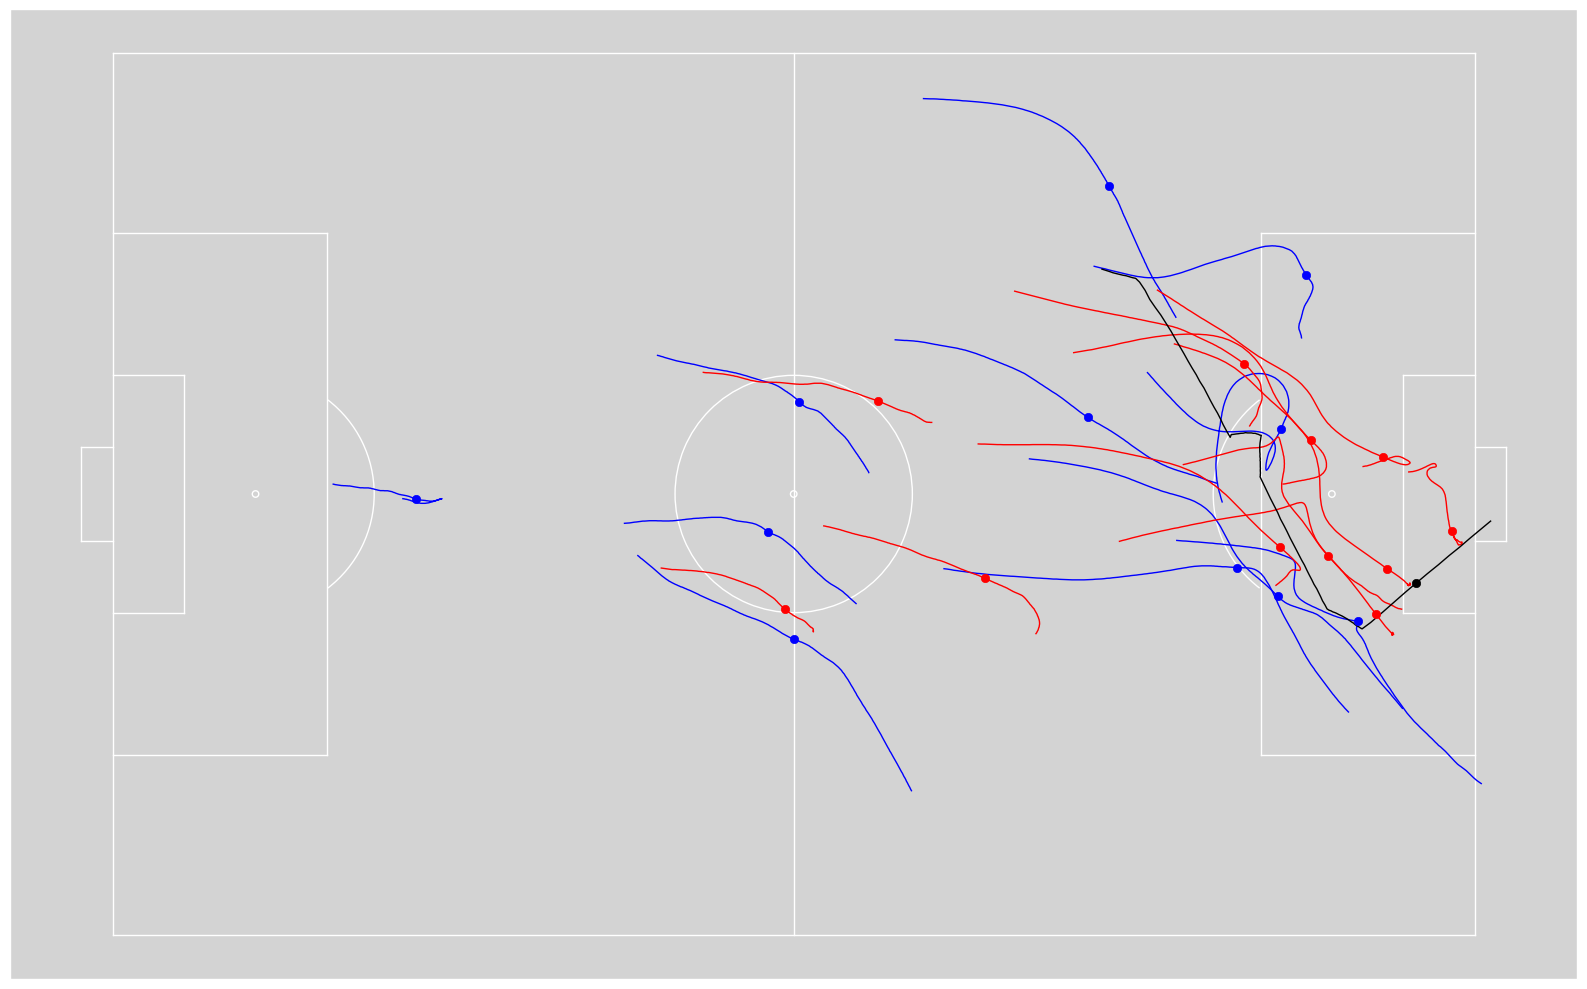

In [69]:
plot_goal_positions(xy_objects, events, pitch)

In [25]:
#  print(dir(xy_objects["firstHalf"]["Home"]))

first_home = xy_objects["firstHalf"]["Home"]
first_away = xy_objects["secondHalf"]["Home"]
type(first_home)
print(len(first_home.x))
print(len(first_home.x))

69424
69424


In [76]:
events_first_away = events["secondHalf"]["Away"].events
events_first_away.gameclock.min()

np.float64(8.81)

In [86]:
# encode labels of all_events in dictionary sorted by eID
events_labels = {}
sorted_events = all_events.sort_values(by=["eID"])
i = 0

for eID in sorted_events["eID"].unique():
    events_labels[eID] = i
    i += 1

# pickle the events_labels dictionary
import pickle
with open("events_labels.pkl", "wb") as f:
    pickle.dump(events_labels, f)

In [43]:
events["firstHalf"]["Home"].events

,eID,gameclock,tID,pID,outcome,timestamp,minute,second,qualifier
0,Foul,12.822,DFL-CLU-00000P,DFL-OBJ-00006V,NaN,2022-08-26 18:32:20.932000+02:00,0.0,12.0,"{'FoulType': 'foul', 'CommittingPlayerAction':..."
1,Caution,16.290,DFL-CLU-00000P,DFL-OBJ-00006V,NaN,2022-08-26 18:32:24.400000+02:00,0.0,16.0,"{'CardRating': 'yellow', 'Player': 'DFL-OBJ-00..."
2,Delete,79.856,None,None,NaN,2022-08-26 18:33:27.966000+02:00,1.0,19.0,{}
3,Delete,82.690,None,None,NaN,2022-08-26 18:33:30.800000+02:00,1.0,22.0,{}
4,OtherBallAction,85.215,DFL-CLU-00000P,DFL-OBJ-0028FW,NaN,2022-08-26 18:33:33.325000+02:00,1.0,25.0,"{'Player': 'DFL-OBJ-0028FW', 'BallPossessionPh..."
...,...,...,...,...,...,...,...,...,...
405,OtherBallAction,2740.250,DFL-CLU-00000P,DFL-OBJ-00003X,NaN,2022-08-26 19:17:48.360000+02:00,45.0,40.0,"{'Player': 'DFL-OBJ-00003X', 'BallPossessionPh..."
406,TacklingGame,2744.030,DFL-CLU-00000P,DFL-OBJ-00006V,1.0,2022-08-26 19:17:52.140000+02:00,45.0,44.0,"{'PossessionChange': 'true', 'WinnerTeam': 'DF..."
407,Foul,2744.543,DFL-CLU-00000P,DFL-OBJ-00006V,NaN,2022-08-26 19:17:52.653000+02:00,45.0,44.0,"{'FoulType': 'foul', 'Fouler': 'DFL-OBJ-00006V..."
408,Delete,2753.590,None,None,NaN,2022-08-26 19:18:01.700000+02:00,45.0,53.0,{}


In [38]:
print(dir(xy_objects["firstHalf"]["Home"]))

['N', '__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'direction', 'frame', 'framerate', 'player', 'plot', 'point', 'reflect', 'rotate', 'scale', 'slice', 'translate', 'x', 'xy', 'y']


In [45]:
xy_objects["firstHalf"]["Home"].frame(0)

array([   nan,    nan,    nan,    nan,   0.59,  -8.72, -12.53, -20.32,
       -16.45,  -6.5 ,  -0.12, -18.05,  -4.2 ,  -7.8 , -11.49,  -2.73,
       -17.32,   5.08,   0.99,   8.39,    nan,    nan, -40.36,  -0.25,
       -13.81,  14.5 ,    nan,    nan,    nan,    nan,  -1.85,  13.53,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan])

In [23]:
xy_objects["firstHalf"]["Home"].x


array([[  nan,   nan,  0.59, ...,   nan,   nan,   nan],
       [  nan,   nan,  0.71, ...,   nan,   nan,   nan],
       [  nan,   nan,  0.83, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan, 16.07, ...,   nan,   nan,   nan],
       [  nan,   nan, 16.04, ...,   nan,   nan,   nan],
       [  nan,   nan, 16.01, ...,   nan,   nan,   nan]])

In [63]:
# player_frame = xy_objects["firstHalf"]["Home"].xy[0]
# print(player_frame)
# # # print number of non null elements in player_frame using numpy nan
# print(np.count_nonzero(~np.isnan(player_frame)))
print(player_frame)

[   nan    nan    nan    nan  16.01  19.95  -3.9    6.96  -6.87  16.1
   2.83   1.22  -6.15  18.36   6.76  12.33  -8.13  19.22  17.16   7.08
    nan    nan -11.16  23.73  -5.11  27.83    nan    nan    nan    nan
  -1.45  32.11    nan    nan    nan    nan    nan    nan    nan    nan]


In [19]:
# load npy files
data_path = "seqlabelvae/"
labeled_sequences = np.load(data_path + "labeled_sequences.npy", allow_pickle=True)
labels = np.load(data_path + "labels.npy", allow_pickle=True)
unlabeled_frames = np.load(data_path + "unlabeled_frames.npy", allow_pickle=True)
events_labels = pickle.load(open(data_path + "events_labels.pkl", "rb"))

In [14]:
len(unlabeled_frames) * 6 / 16

51455.25

In [12]:
len(labeled_sequences) *6

15984

In [16]:
len(labels)

2664

In [27]:
events_labels.keys()

dict_keys(['BallClaiming', 'BallDeflection', 'Caution', 'CautionTeamofficial', 'ChanceWithoutShot', 'CornerKick_Play_Cross', 'CornerKick_Play_Pass', 'Delete', 'FairPlay', 'FinalWhistle', 'Foul', 'FreeKick_Play_Cross', 'FreeKick_Play_Pass', 'FreeKick_ShotAtGoal_BlockedShot', 'FreeKick_ShotAtGoal_SavedShot', 'FreeKick_ShotAtGoal_ShotWide', 'GoalDisallowed', 'GoalKick_Play_Pass', 'KickOff_Play_Pass', 'Nutmeg', 'Offside', 'OtherBallAction', 'OtherPlayerAction', 'OutSubstitution', 'PenaltyNotAwarded', 'Penalty_ShotAtGoal_SuccessfulShot', 'Play_Cross', 'Play_Pass', 'PlayerNotSentOff', 'PossessionLossBeforeGoal', 'RefereeBall', 'Run', 'ShotAtGoal_BlockedShot', 'ShotAtGoal_OtherShot', 'ShotAtGoal_SavedShot', 'ShotAtGoal_ShotWide', 'ShotAtGoal_ShotWoodWork', 'ShotAtGoal_SuccessfulShot', 'SitterPrevented', 'SpectacularPlay', 'TacklingGame', 'ThrowIn', 'ThrowIn_Play_Cross', 'ThrowIn_Play_Pass', 'VideoAssistantAction'])

In [58]:
eids = all_events.eID.unique()

# remove 'Deleted' from eids
eids = [eid for eid in eids if eid != 'Deleted']

# create label map to integer
label_map = {eid: i for i, eid in enumerate(eids)}

# pickle label_map
with open("events_labels.pkl", "wb") as f:
    pickle.dump(label_map, f)

{'ThrowIn_Play_Pass': 0,
 'TacklingGame': 1,
 'OtherBallAction': 2,
 'Delete': 3,
 'BallClaiming': 4,
 'Play_Pass': 5,
 'Play_Cross': 6,
 'ShotAtGoal_ShotWide': 7,
 'Foul': 8,
 'RefereeBall': 9,
 'KickOff_Play_Pass': 10,
 'GoalKick_Play_Pass': 11,
 'ThrowIn_Play_Cross': 12,
 'ShotAtGoal_SavedShot': 13,
 'CornerKick_Play_Cross': 14,
 'FreeKick_Play_Pass': 15,
 'PlayerNotSentOff': 16,
 'Caution': 17,
 'ShotAtGoal_BlockedShot': 18,
 'ChanceWithoutShot': 19,
 'VideoAssistantAction': 20,
 'PenaltyNotAwarded': 21,
 'FinalWhistle': 22,
 'ShotAtGoal_SuccessfulShot': 23,
 'ShotAtGoal_ShotWoodWork': 24,
 'BallDeflection': 25,
 'Offside': 26,
 'GoalDisallowed': 27,
 'FreeKick_Play_Cross': 28,
 'OutSubstitution': 29,
 'CornerKick_Play_Pass': 30,
 'Penalty_ShotAtGoal_SuccessfulShot': 31,
 'PossessionLossBeforeGoal': 32,
 'OtherPlayerAction': 33,
 'Run': 34,
 'SpectacularPlay': 35,
 'SitterPrevented': 36,
 'CautionTeamofficial': 37,
 'ThrowIn': 38,
 'FreeKick_ShotAtGoal_BlockedShot': 39,
 'Nutmeg': 